## Stochastic simulation algorithm

In [2]:
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import poisson

## Exponential distribution

(array([0.78131649, 0.3814301 , 0.17841085, 0.09228148, 0.04460271,
        0.03845061, 0.0123042 , 0.0061521 , 0.        , 0.00307605]),
 array([3.77798839e-04, 6.50562462e-01, 1.30074713e+00, 1.95093179e+00,
        2.60111645e+00, 3.25130112e+00, 3.90148578e+00, 4.55167044e+00,
        5.20185511e+00, 5.85203977e+00, 6.50222443e+00]),
 <BarContainer object of 10 artists>)

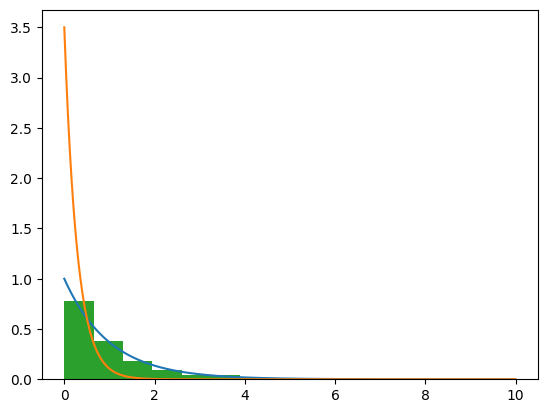

In [3]:
m = np.arange(0, 10, 0.01)
plt.plot(m, expon.pdf(m)) # Exponential distribution with rate 1
plt.plot(m, expon.pdf(m, 0.0, 1/3.5)) # Exponential distribution with rate 3.5
plt.hist(-np.log(rand(1000)), density=True)

## Q1: Simulation algorithm

In [4]:
k0 = 0.2 # production
k1 = 0.01 # degradation
omega = 1 # cell volume
stoichiometry = [1, -1]

def propensities(x):
    return [omega*k0, k1*x]

def reaction_times(x):
    a = propensities(x)
    aInv = [1/s if s > 0 else np.inf for s in a]
    return -np.log(rand(2)) * aInv

def ssa_step(x, tIn, tOut):
    # take the state x at time tIn and return the state at time tOut
    t = tIn
    
    while t < tOut:
        rt = reaction_times(x)
        idx = np.argmin(rt)
        tau = np.min(rt)
        #tau = rt[idx]
    
        x += stoichiometry[idx] 
        t += tau
    return x

In [5]:
# Simulation code

dt = 0.01 # time-step
x = 0    # initial mRNA amount
t = 0.0  # initial time

mrna = [x]
time = [t]
for i in range(100000):
    x = ssa_step(x, t, t+dt)
    t += dt
    mrna.append(x)
    time.append(t)

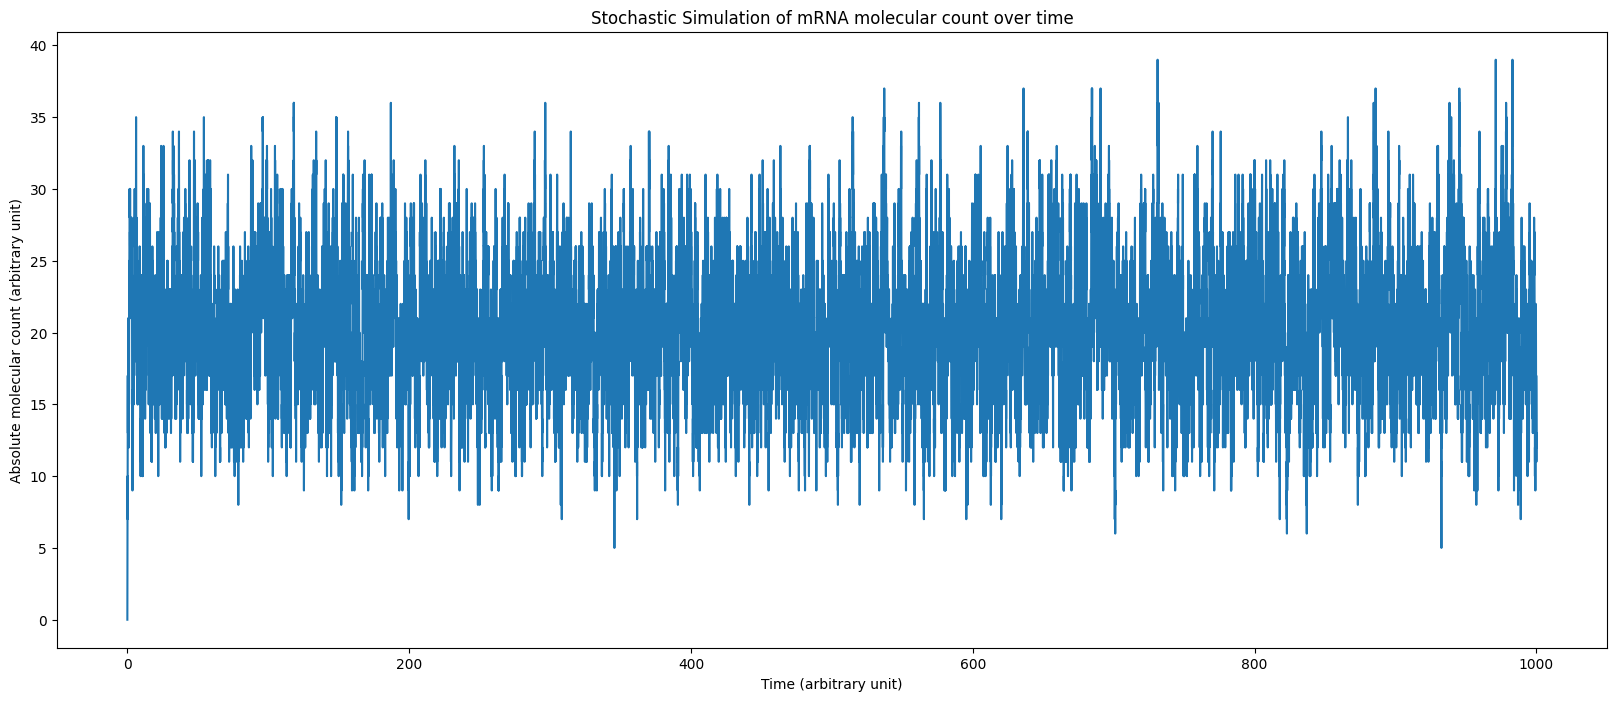

In [6]:
plt.figure(figsize=(20,8))
plt.xlabel("Time (arbitrary unit)")
plt.ylabel("Absolute molecular count (arbitrary unit)")
plt.title("Stochastic Simulation of mRNA molecular count over time")
plt.plot(time, mrna)

## Q2: Multi simulation loop

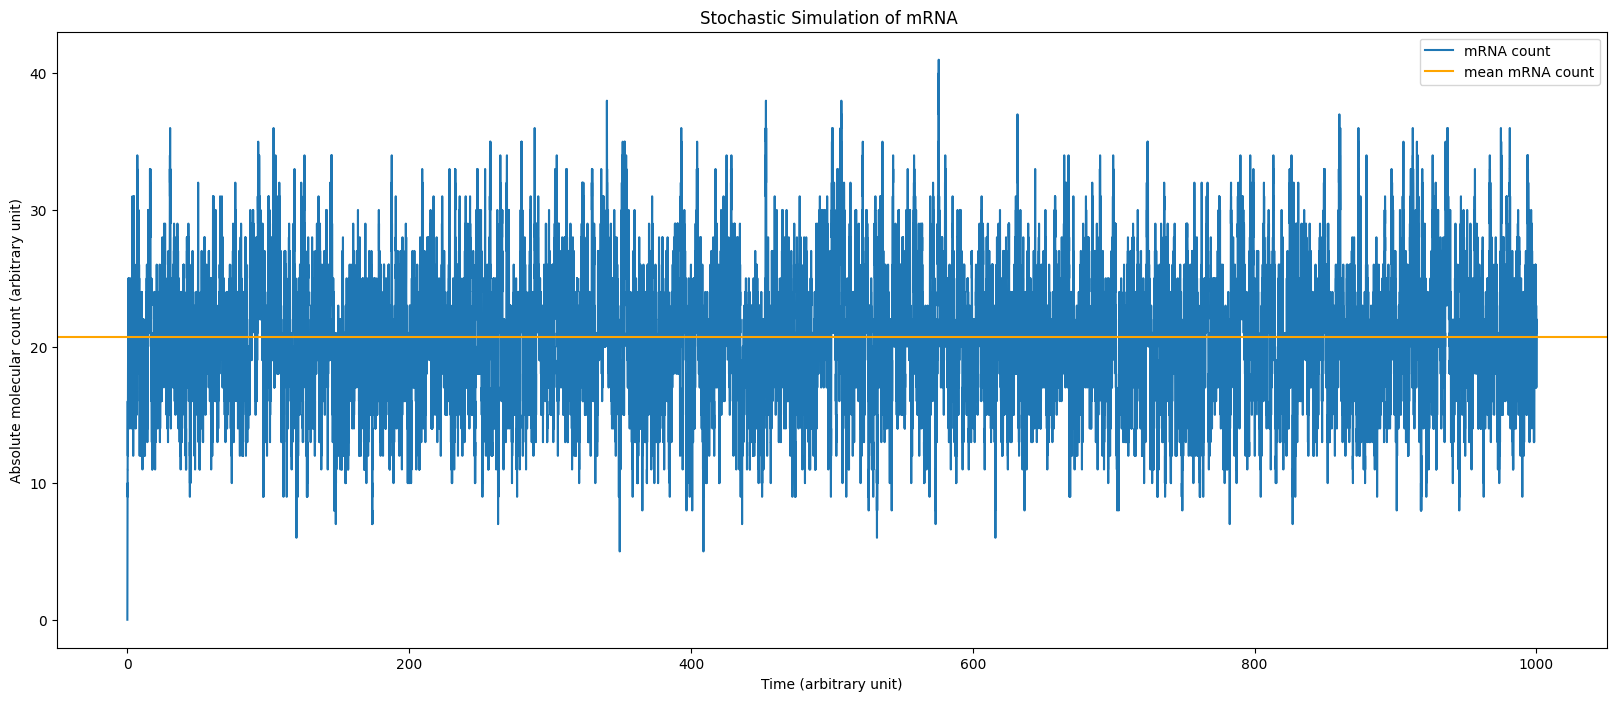

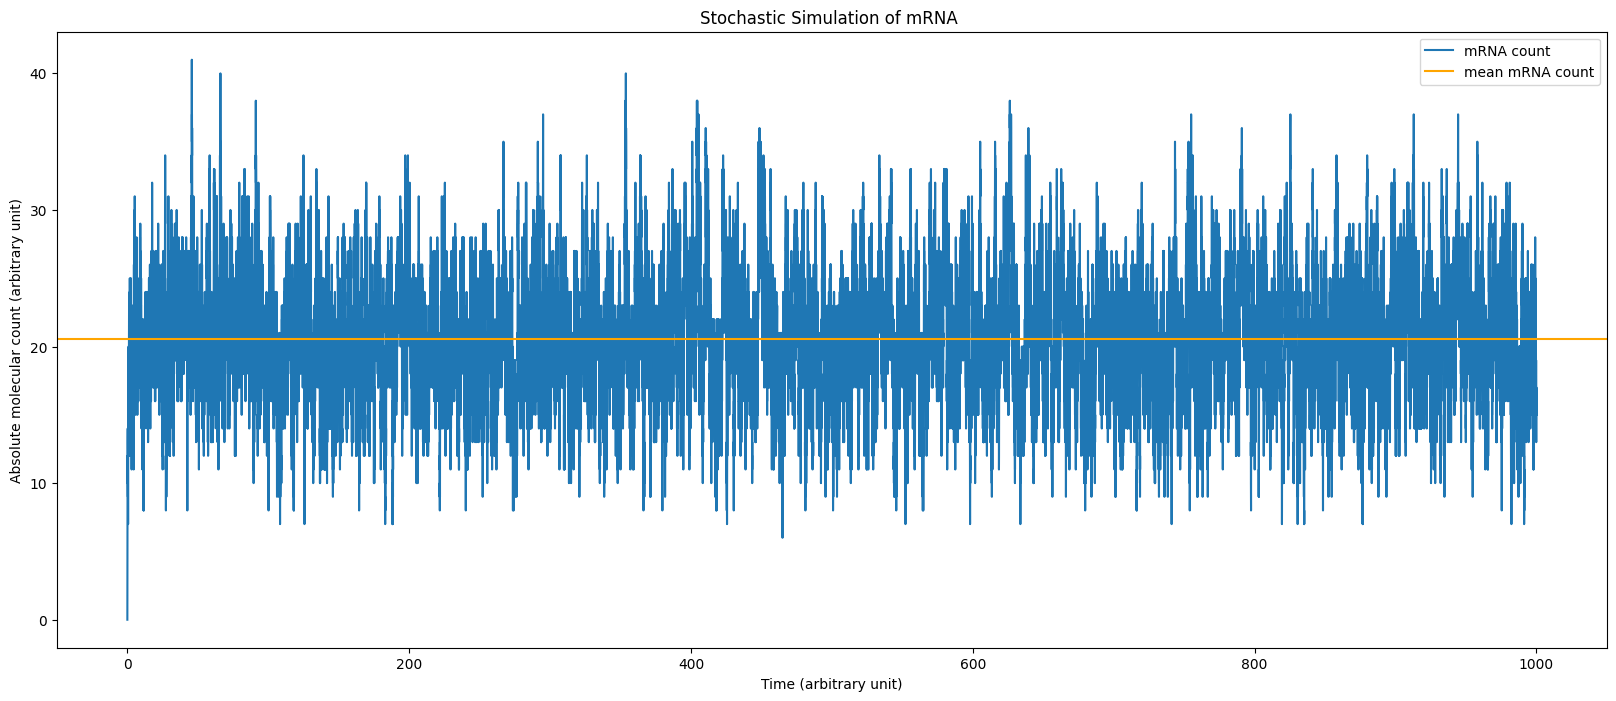

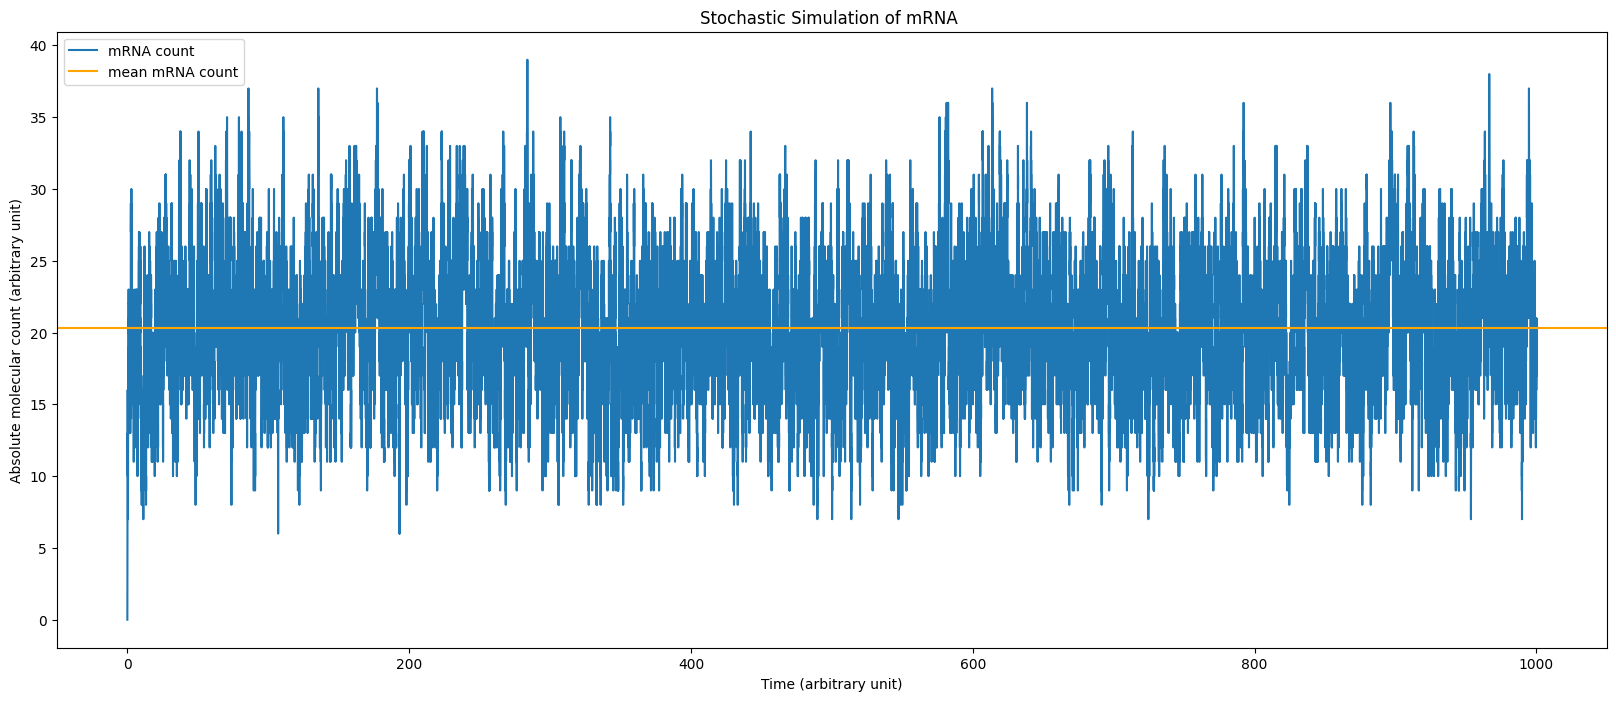

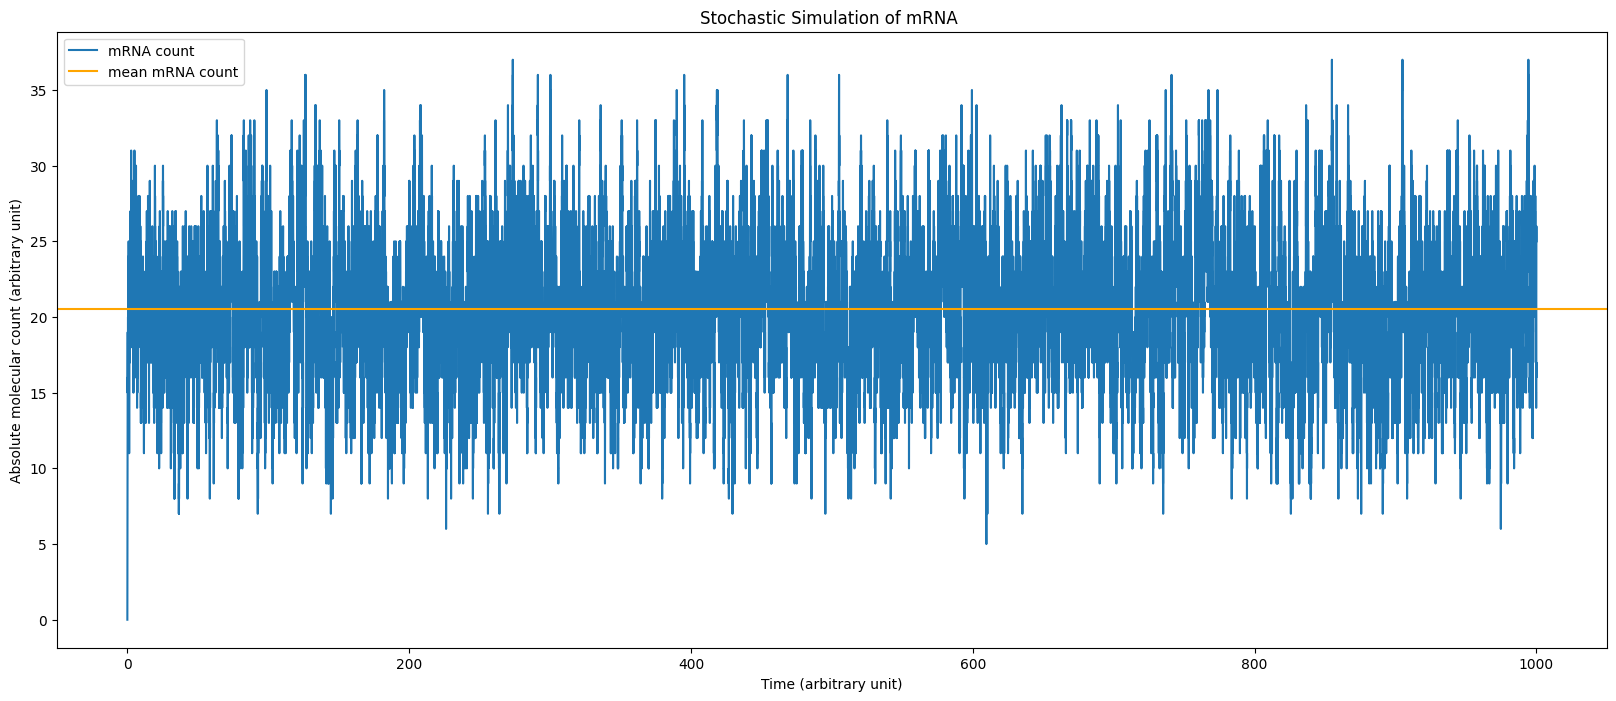

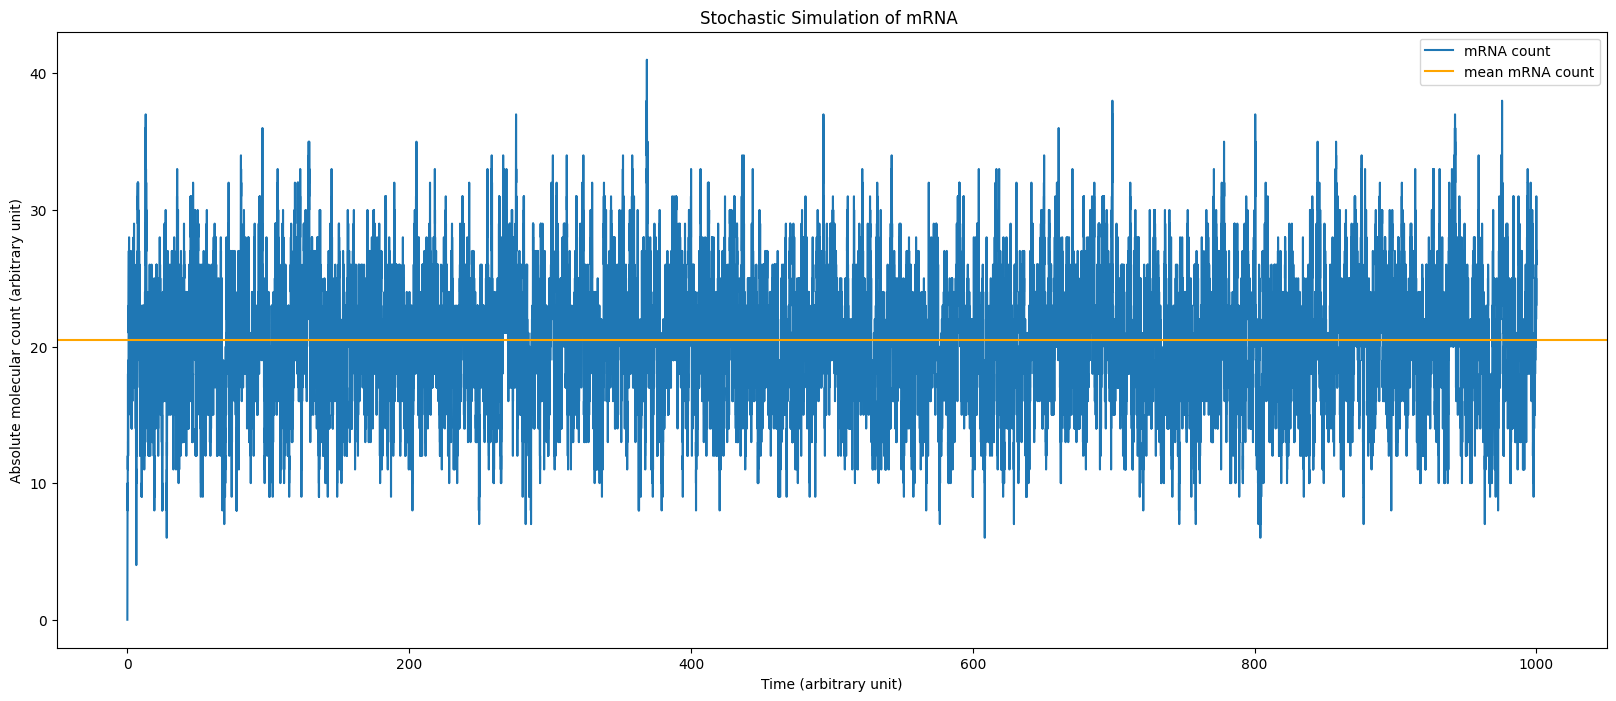

In [7]:
mu_bin = [] # collection of all means
var_bin = [] # collection of all variances

for j in range(5):

    dt = 0.01 # time-step
    x = 0    # initial state
    t = 0.0  

    mrna = [x]
    time = [t]
    for i in range(100000):
        x = ssa_step(x, t, t+dt)
        t += dt
        mrna.append(x)
        time.append(t)

    mu_bin.append(np.mean(mrna))
    var_bin.append(np.var(mrna))

    plt.figure(figsize=(20,8))
    plt.xlabel("Time (arbitrary unit)")
    plt.ylabel("Absolute molecular count (arbitrary unit)")
    plt.title("Stochastic Simulation of mRNA ")
    plt.plot(time, mrna)
    plt.axhline(np.mean(mrna), color = 'orange')
    plt.legend(['mRNA count','mean mRNA count'])

In [8]:
print(mu_bin)
print(var_bin)

[20.692043079569203, 20.52971470285297, 20.29182708172918, 20.549744502554976, 20.465945340546593]
[20.553556051223623, 20.57183380926663, 20.351402588713086, 19.900088958830814, 20.013482633745976]


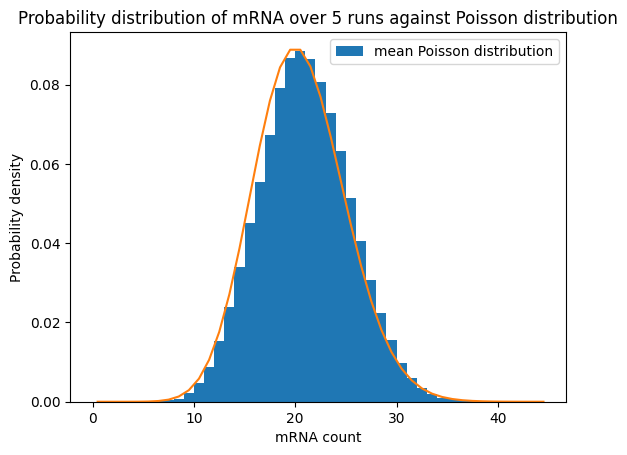

In [9]:
mu = omega*(k0/k1)
poisson.stats(mu)

fano = np.var(mrna)/np.mean(mrna)
np.mean(mrna), np.var(mrna), fano, np.std(mrna)/np.sqrt(np.mean(mrna))

plt.figure()
plt.hist(mrna, bins=range(0, max(mrna)), density=True)
ar = np.arange(0, 45)
plt.legend(['mean Poisson distribution','mean mRNA frequency','Poisson distribution','mRNA count distribution'])
plt.xlabel("mRNA count")
plt.ylabel("Probability density")
plt.title("Probability distribution of mRNA over 5 runs against Poisson distribution")
plt.plot(ar + 0.5, poisson.pmf(ar, mu))

## Q3: Stochastic simulations

In [10]:
# Simulation code

dt = 0.01 # time-step
x = 20    # initial state
t = 0.0  

mrna = [x]
time = [t]
for i in range(100000):
    x = ssa_step(x, t, t+dt)
    t += dt
    mrna.append(x)
    time.append(t)

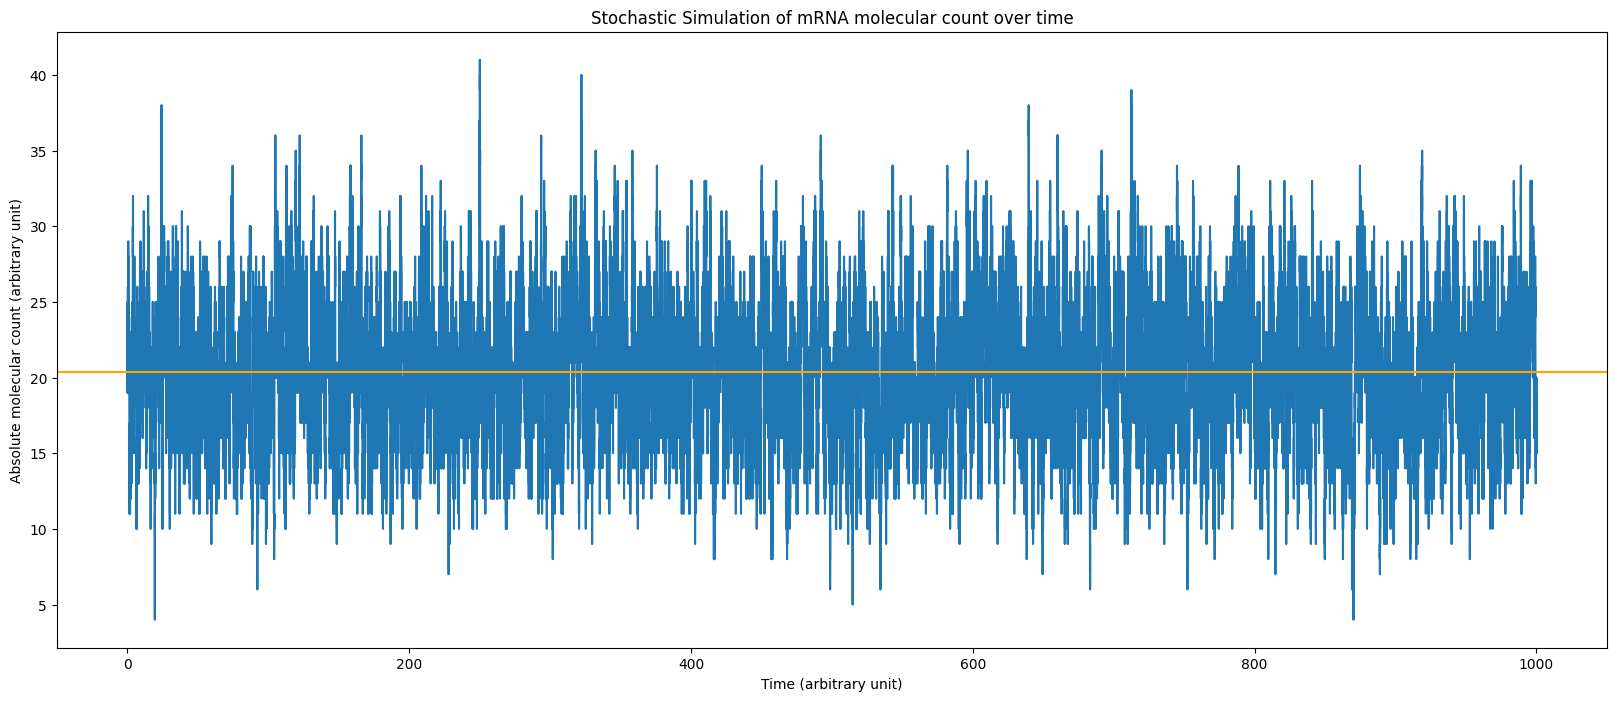

In [11]:
plt.figure(figsize=(20,8))
plt.xlabel("Time (arbitrary unit)")
plt.ylabel("Absolute molecular count (arbitrary unit)")
plt.title("Stochastic Simulation of mRNA molecular count over time")
plt.plot(time, mrna)
plt.axhline(np.mean(mrna), color = 'orange')

## Multi simulation

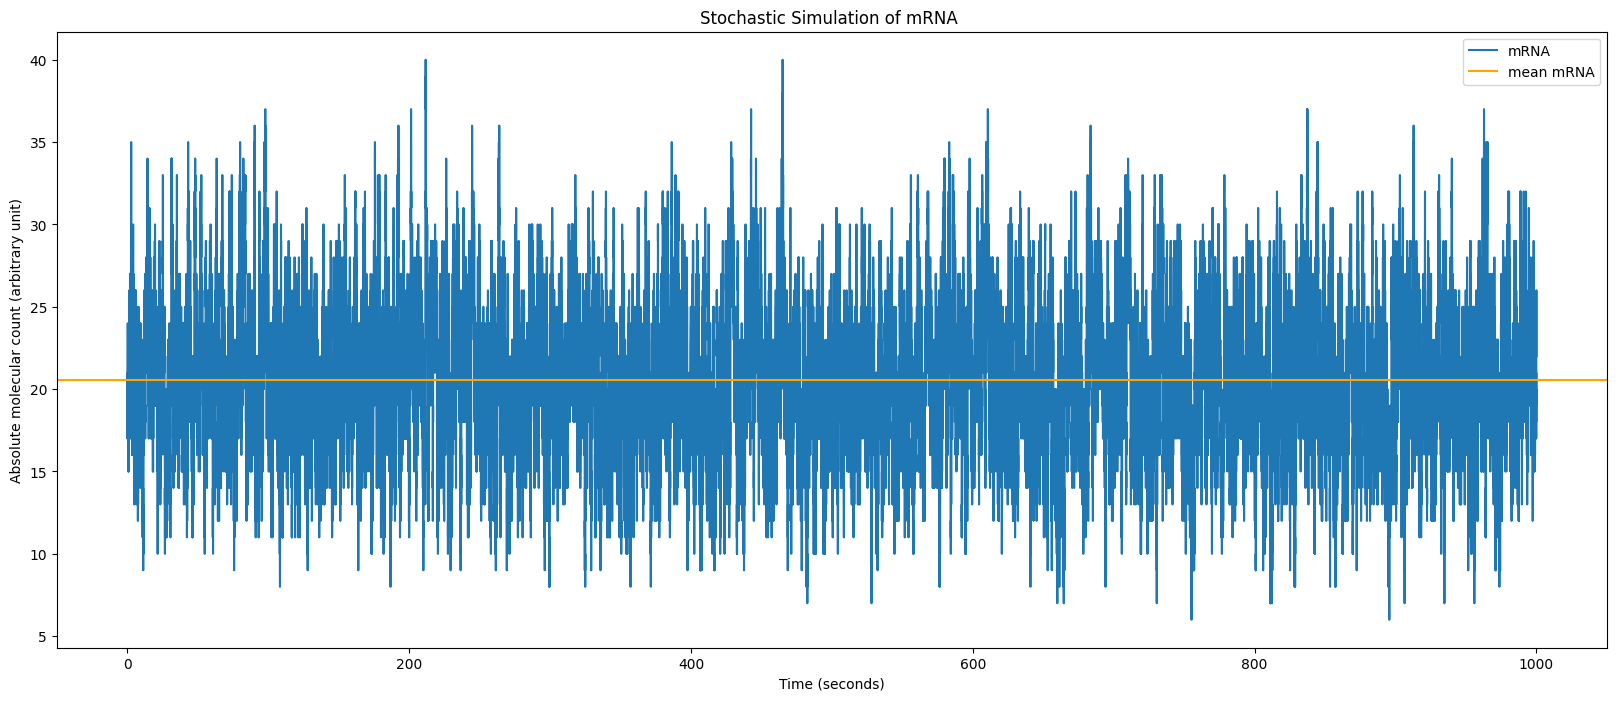

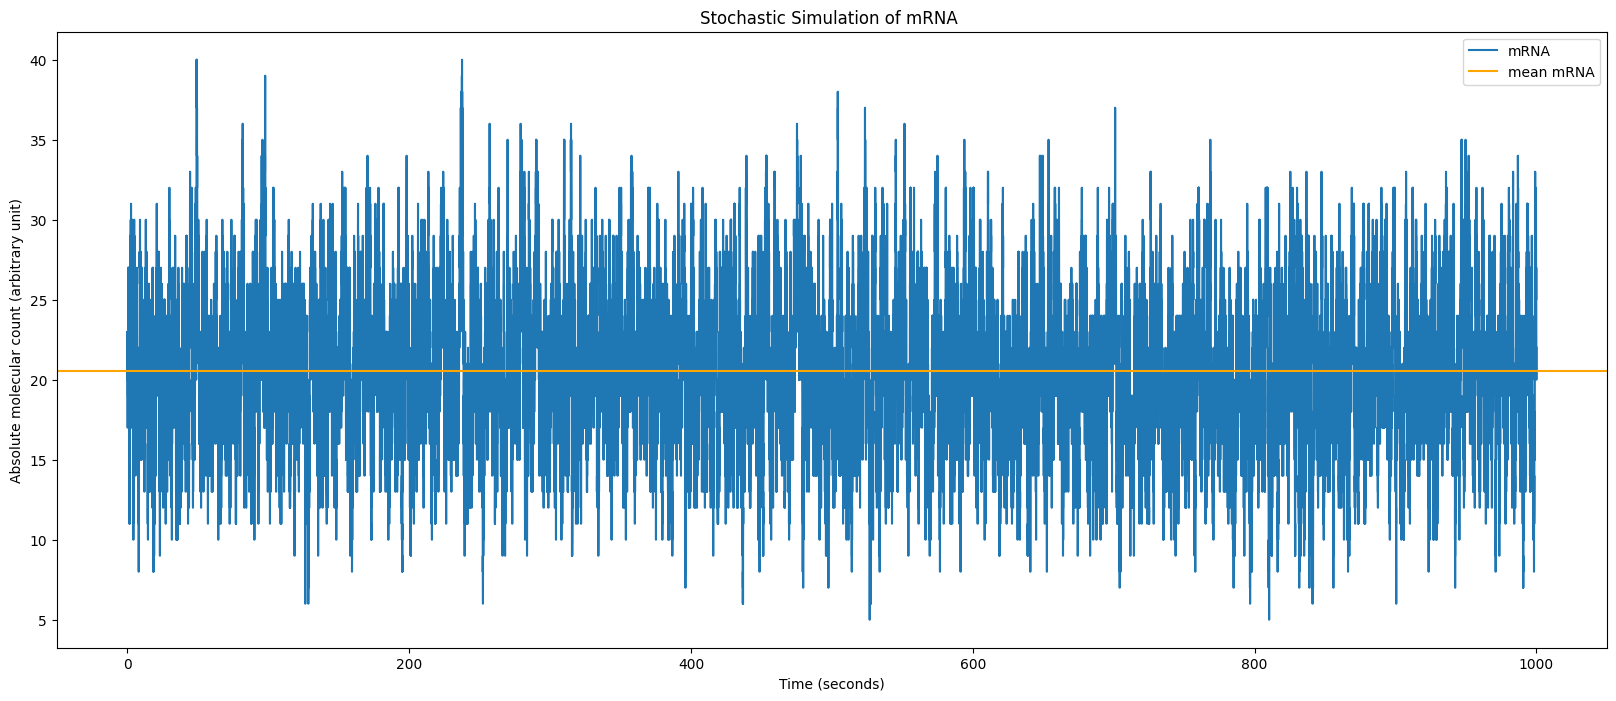

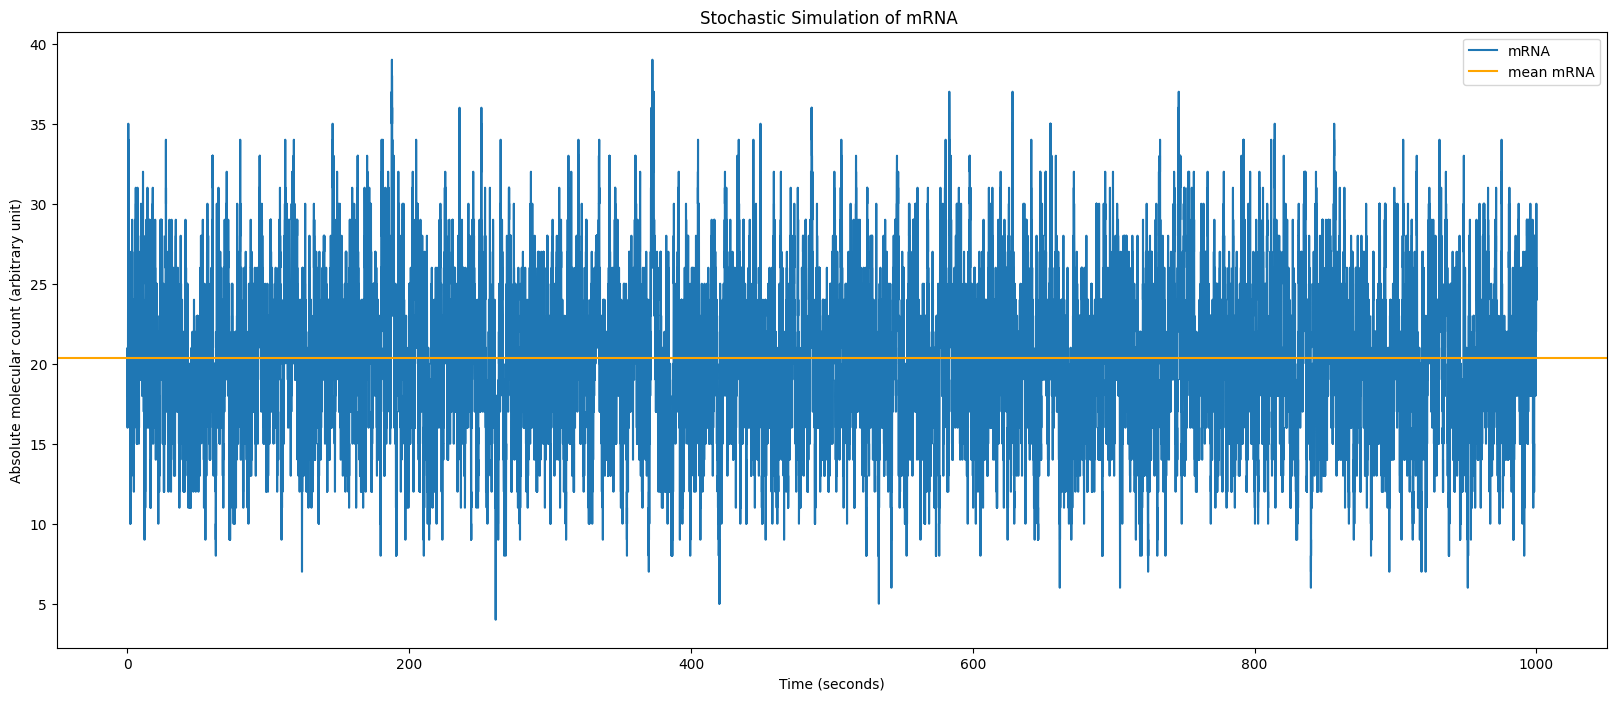

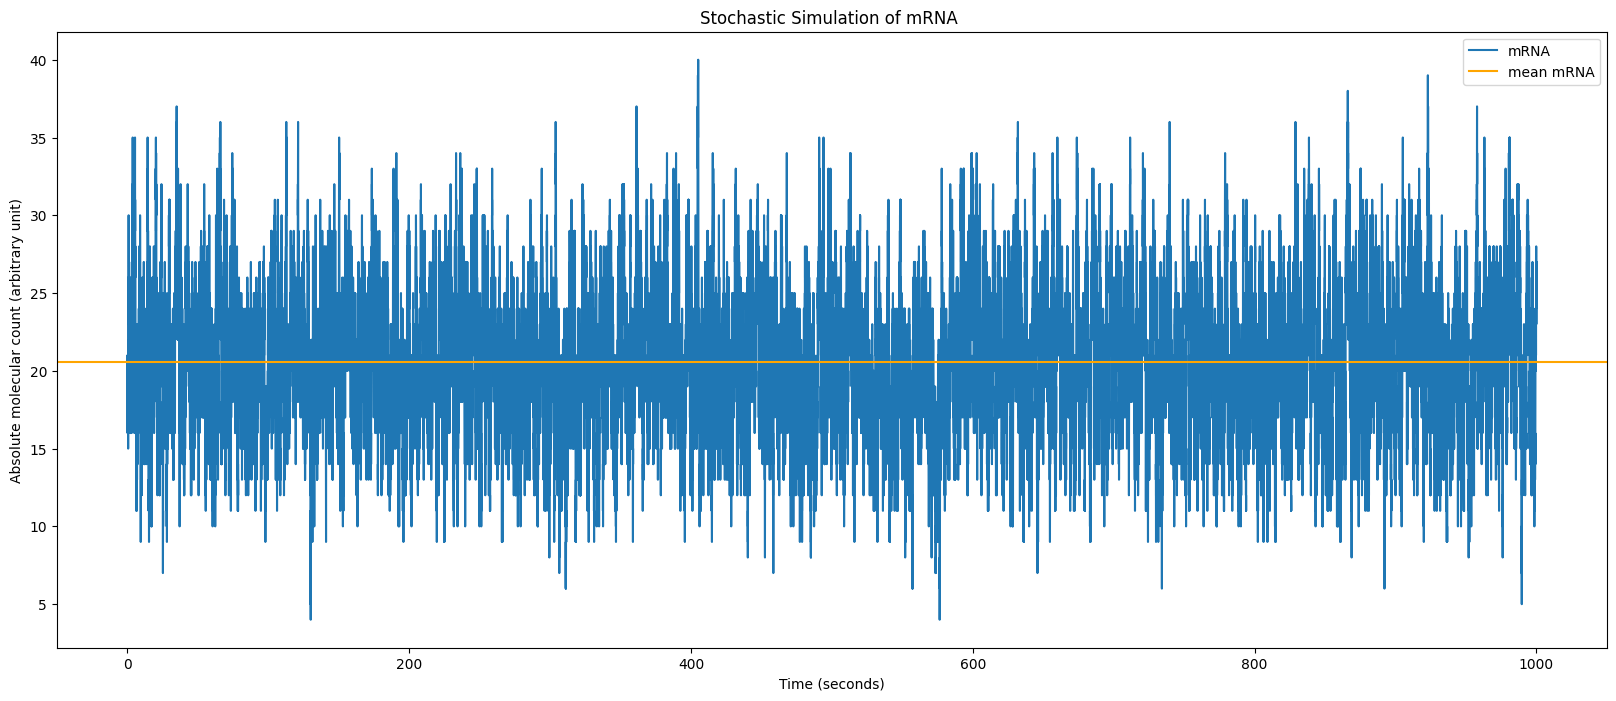

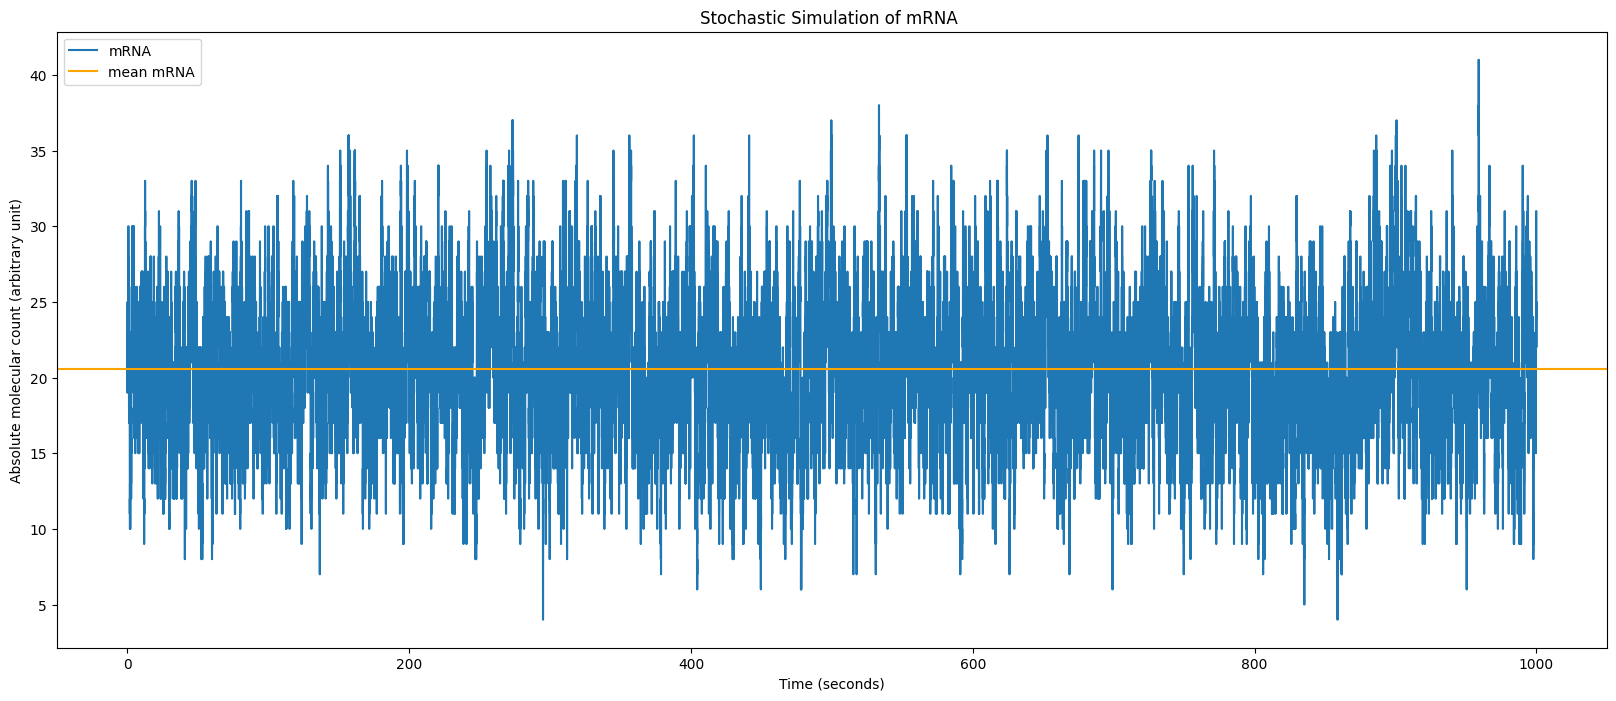

In [12]:
mrna_bin = [] # collection of all mrna values

mu_bin = [] # collection of all means
var_bin = [] # collection of all variances

for j in range(5):

    dt = 0.01 # time-step
    x = 20    # initial state
    t = 0.0  

    mrna = [x]
    time = [t]
    for i in range(100000):
        x = ssa_step(x, t, t+dt)
        t += dt
        mrna.append(x)
        mrna_bin.append(x)
        time.append(t)

    mu_bin.append(np.mean(mrna))
    var_bin.append(np.var(mrna))

    plt.figure(figsize=(20,8))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Absolute molecular count (arbitrary unit)")
    plt.title("Stochastic Simulation of mRNA ")
    plt.plot(time, mrna)
    plt.axhline(np.mean(mrna), color = 'orange')
    plt.legend(["mRNA","mean mRNA"])

## Steady state distribution

In [13]:
mu = omega*(k0/k1)
poisson.stats(mu)

(20.0, 20.0)

In [14]:
fano = np.var(mrna_bin)/np.mean(mrna_bin)
np.mean(mrna_bin), np.var(mrna_bin), fano, np.std(mrna_bin)/np.sqrt(np.mean(mrna_bin))

(20.521884, 20.509109090543998, 0.9993774982133218, 0.9996887006530191)

Fano factor close to 1. This is due to the property of the Poisson distribution - when at steady state, the standard deviation equates to square root of mean. 

Text(0.5, 1.0, 'Probability distribution of mRNA over 5 runs at steady state against Poisson distribution')

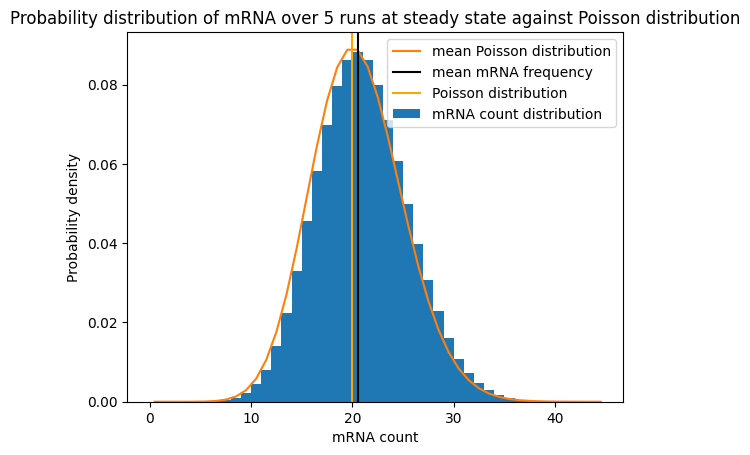

In [15]:
plt.figure()
plt.hist(mrna_bin, bins=range(0, max(mrna_bin)), density=True)
ar = np.arange(0, 45)
plt.plot(ar + 0.5, poisson.pmf(ar, mu))
plt.axvline(np.mean(mu_bin), color = 'black')
plt.axvline(mu, color = 'orange')
plt.legend(['mean Poisson distribution','mean mRNA frequency','Poisson distribution','mRNA count distribution'])
plt.xlabel("mRNA count")
plt.ylabel("Probability density")
plt.title("Probability distribution of mRNA over 5 runs at steady state against Poisson distribution")

## Q4: Protein expansion

In [16]:
k0 = 0.2 # mrna production rate
k1 = 0.01 # mrna degradation rate
k2 = 5 # protein production rate
k3 = 1 # protein degradation rate

omega = 1 # cell volume
stoichiometry = [1, -1, 1, -1]

def propensities(x,p):
    return [omega*k0, k1*x, k2*x, k3*p]

def reaction_times(x,p):
    a = propensities(x,p)
    aInv = [1/s if s > 0 else np.inf for s in a]
    return -np.log(rand(4)) * aInv

def ssa_step(x, p, tIn, tOut):
    # take the state x at time tIn and return the state at time tOut
    t = tIn
    
    while t < tOut:

        rt = reaction_times(x,p)
        idx = np.argmin(rt)
        
        #tau = rt[idx]
        tau = np.min(rt)
        
        if idx <= 1:
            x += stoichiometry[idx] 

        else:
            p += stoichiometry[idx]

        t += tau

    return x, p

In [17]:
# Simulation code

dt = 0.01 # time-step
x = 0    # initial mRNA count
p = 0    # initial protein count
t = 0.0  # intial time

mrna = [x]
protein = [p]
time = [t]
for i in range(100000):
    x,p = ssa_step(x, p, t, t+dt)
    t += dt
    mrna.append(x)
    protein.append(p)
    time.append(t)

In [18]:
np.mean(mrna), np.mean(protein)

(17.256797432025678, 86.9020809791902)

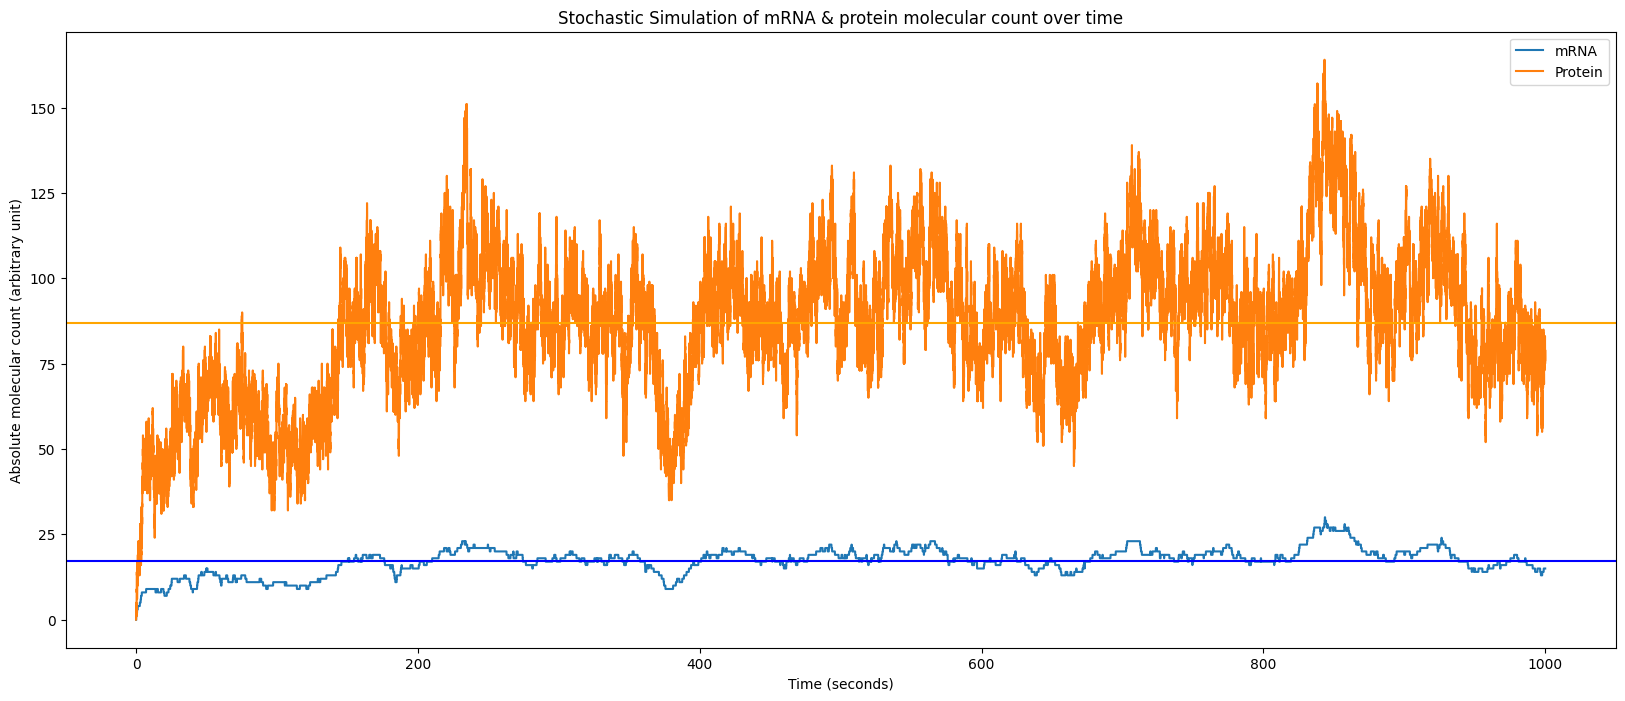

In [19]:
plt.figure(figsize=(20,8))
plt.xlabel("Time (seconds)")
plt.ylabel("Absolute molecular count (arbitrary unit)")
plt.title("Stochastic Simulation of mRNA & protein molecular count over time")
plt.plot(time, mrna)
plt.plot(time, protein)
plt.axhline(np.mean(mrna), color = 'blue')
plt.axhline(np.mean(protein), color = 'orange')
plt.legend(["mRNA","Protein"])

# Simulation loops

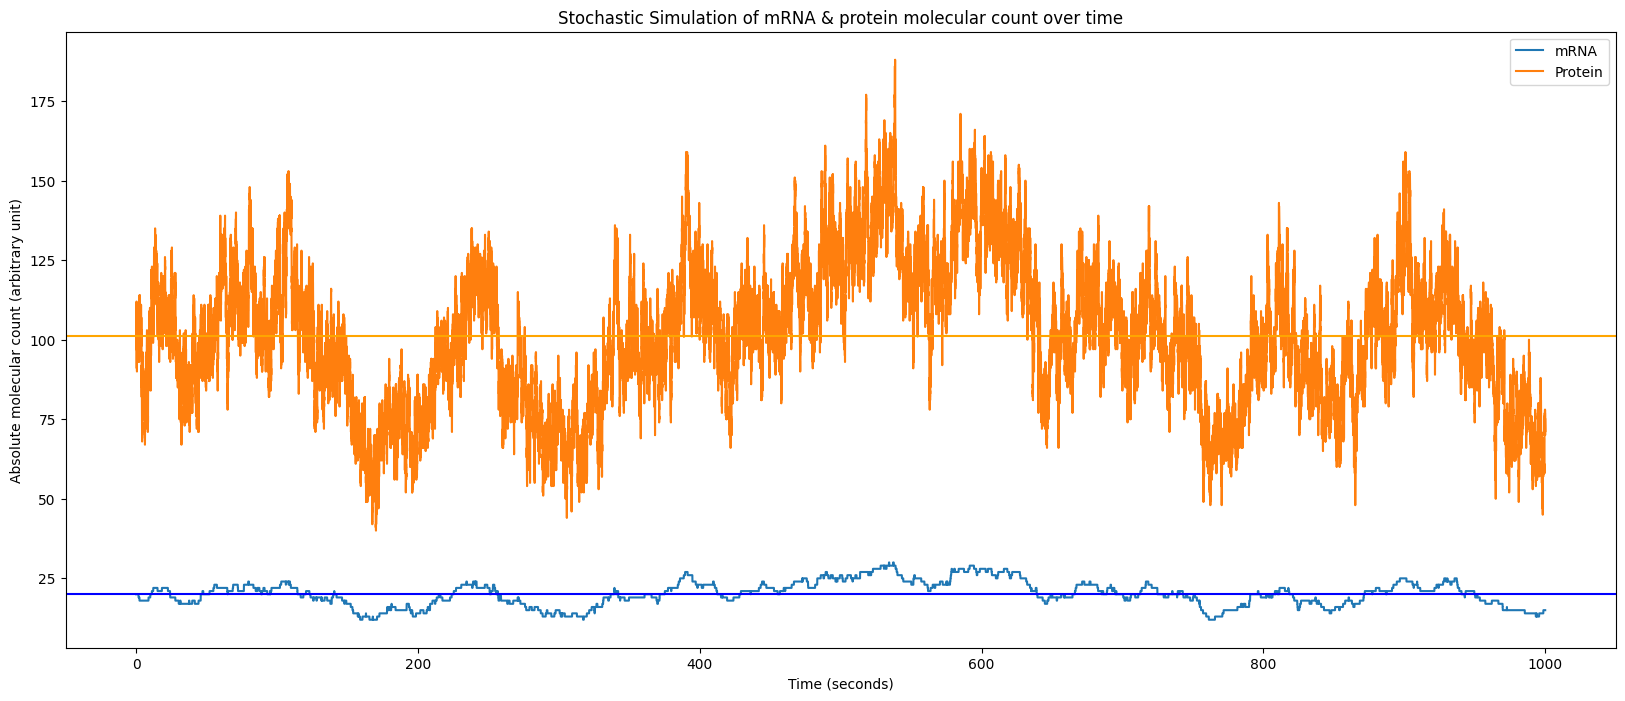

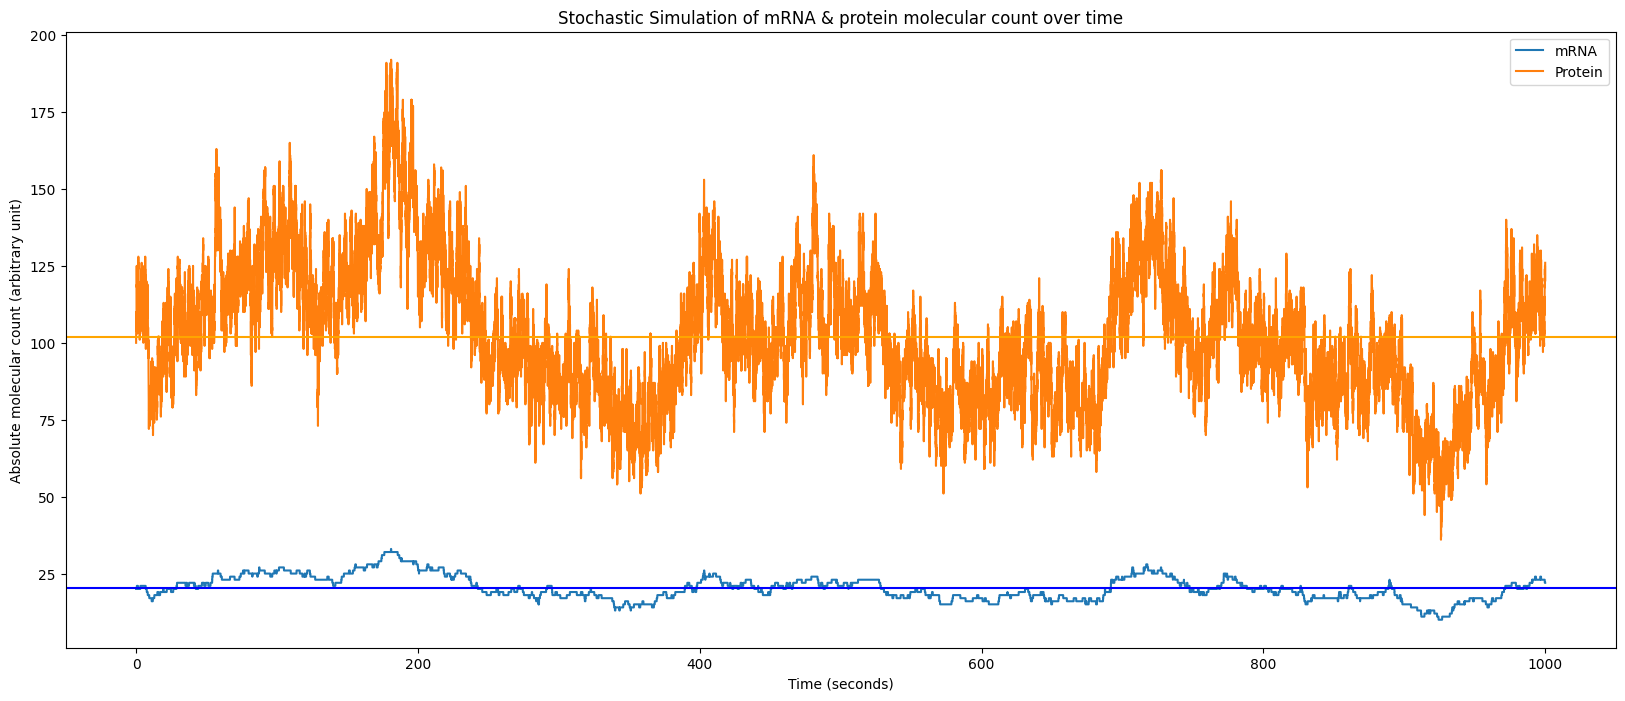

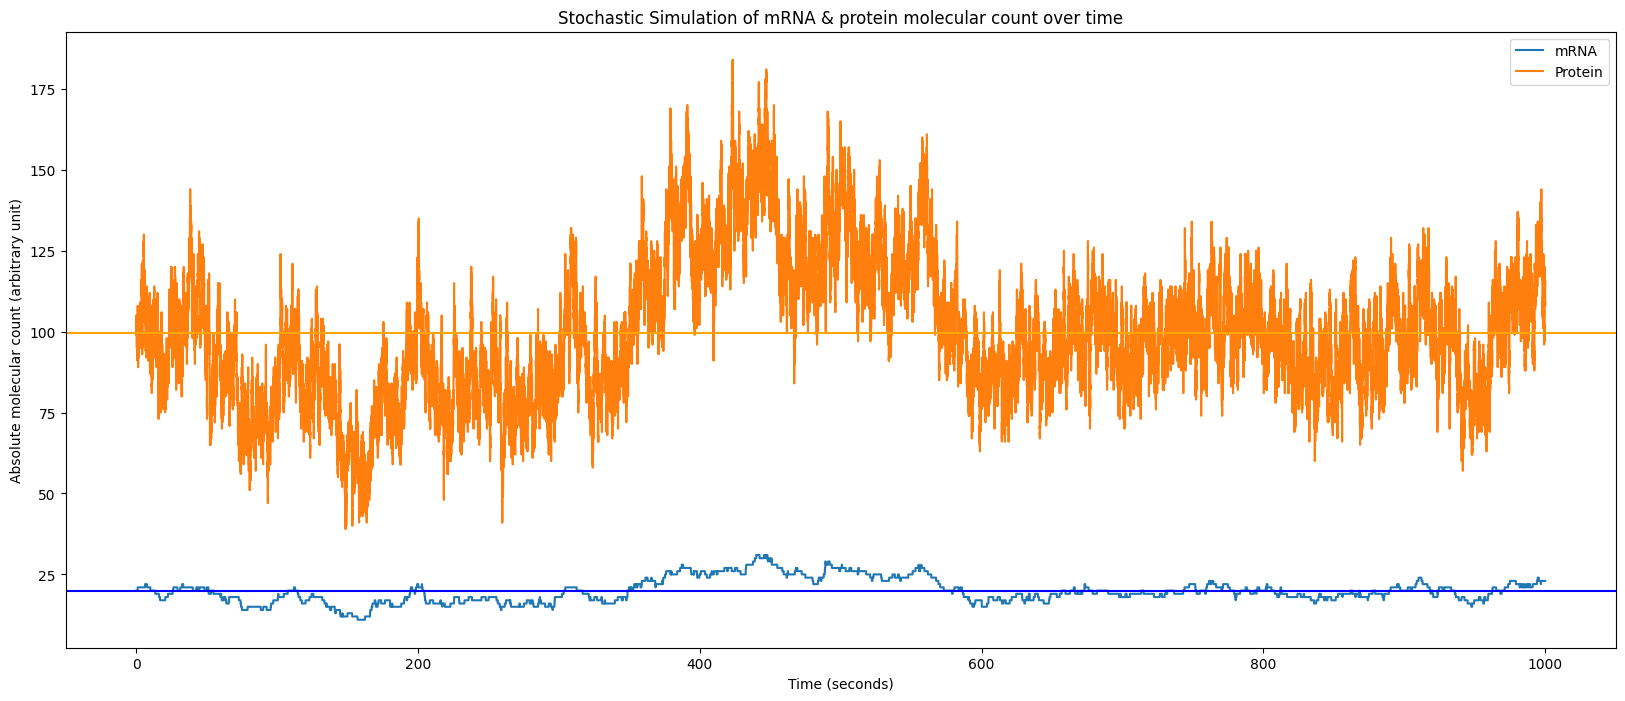

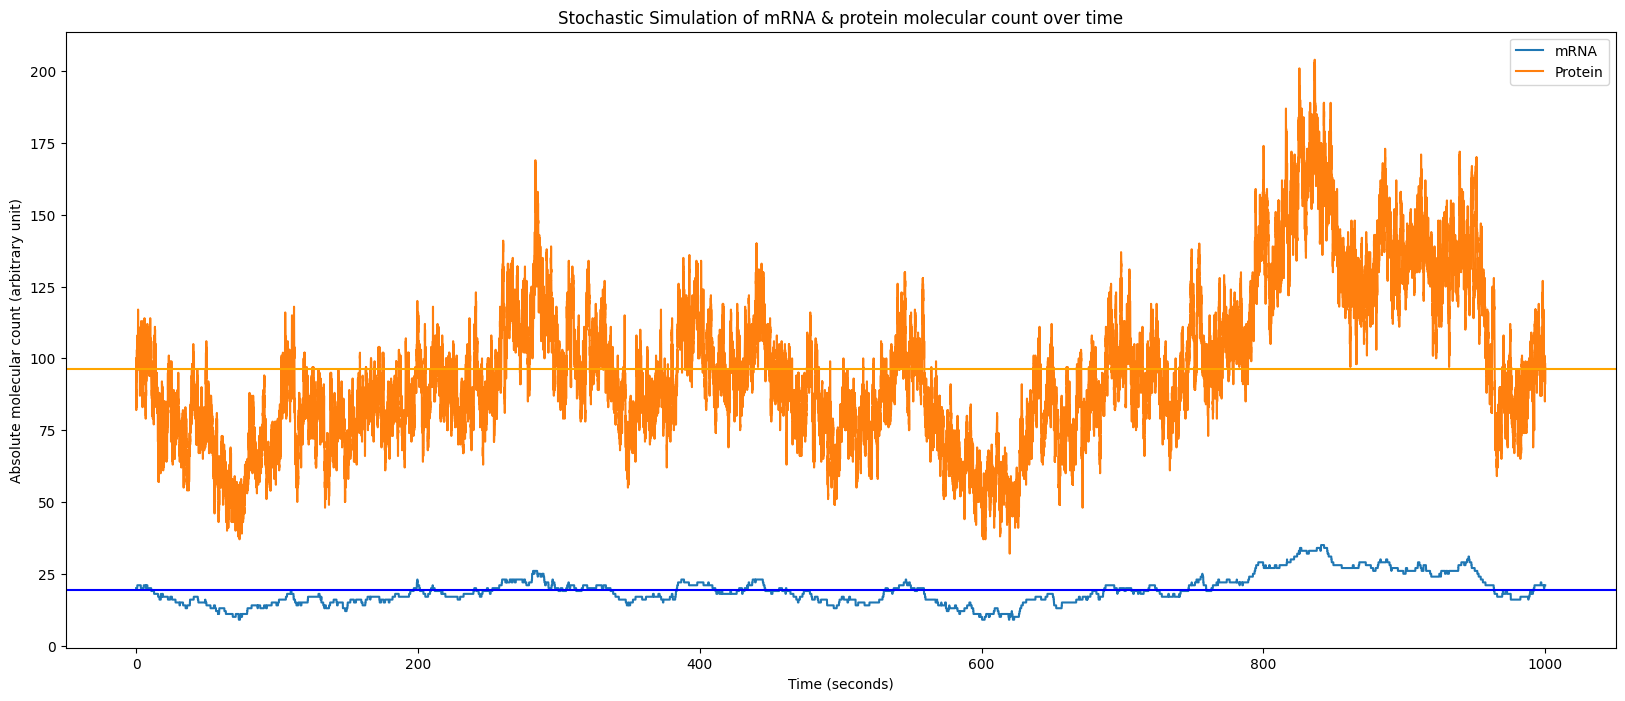

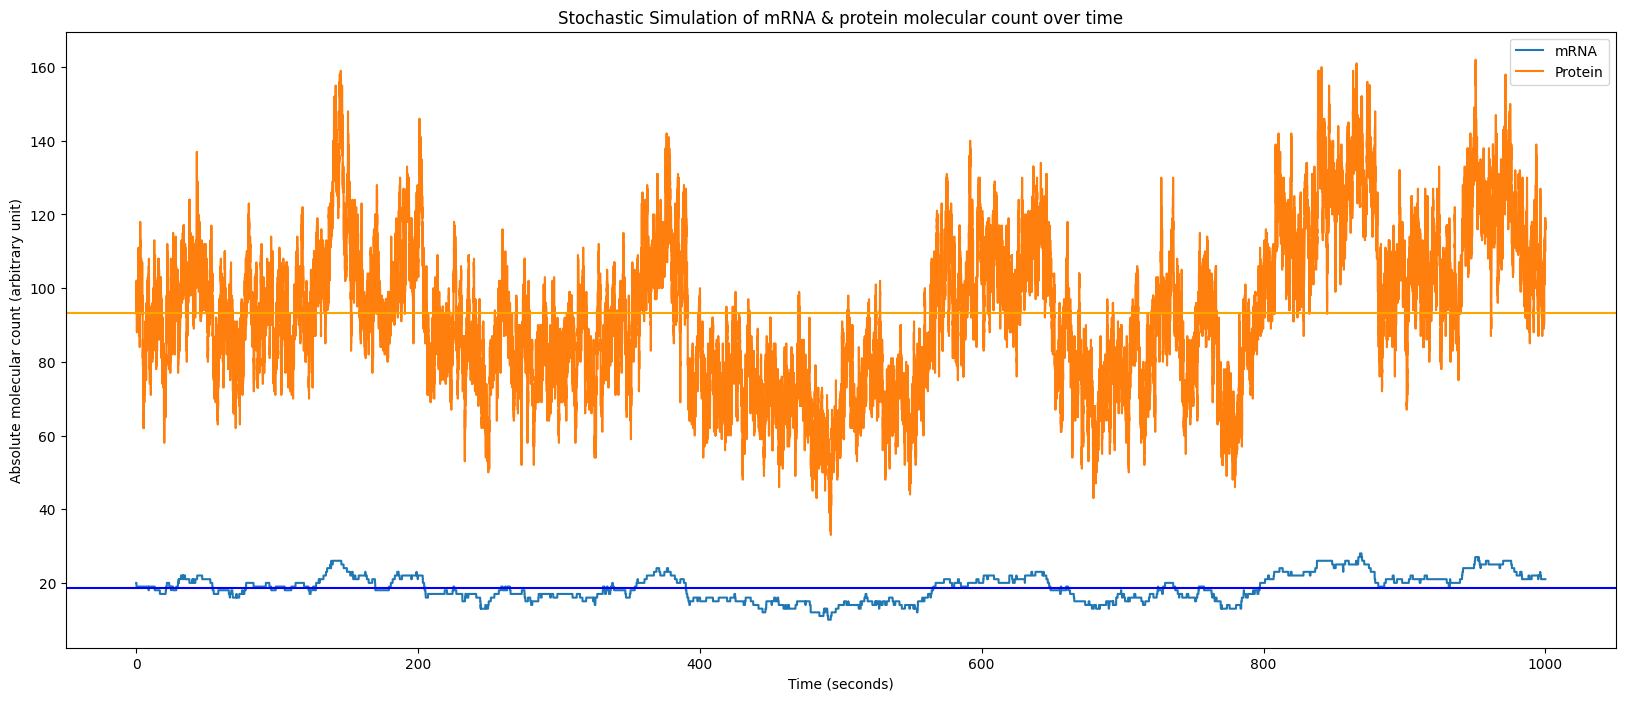

In [20]:
# Simulation code 
mrna_bin = []
protein_bin = []
mrna_mean_bin = []
mrna_var_bin = []
protein_mean_bin = []
protein_var_bin = []

for j in range(5):
    dt = 0.01 # time-step
    x = 20    # initial state
    p = 100
    t = 0.0 
    mrna = [x]
    protein = [p]
    time = [t]
    for i in range(100000):
        x,p = ssa_step(x, p, t, t+dt)
        t += dt
        mrna.append(x)
        protein.append(p)
        mrna_bin.append(x)
        protein_bin.append(p)
        time.append(t)

    mrna_mean_bin.append(np.mean(mrna))
    protein_mean_bin.append(np.mean(protein))

    plt.figure(figsize=(20,8))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Absolute molecular count (arbitrary unit)")
    plt.title("Stochastic Simulation of mRNA & protein molecular count over time")
    plt.plot(time, mrna)
    plt.plot(time, protein)
    plt.axhline(np.mean(mrna), color = 'blue')
    plt.axhline(np.mean(protein), color = 'orange')
    plt.legend(["mRNA","Protein"])

Text(0.5, 1.0, 'Probability distribution of protein over 5 runs at steady state against Poisson distribution')

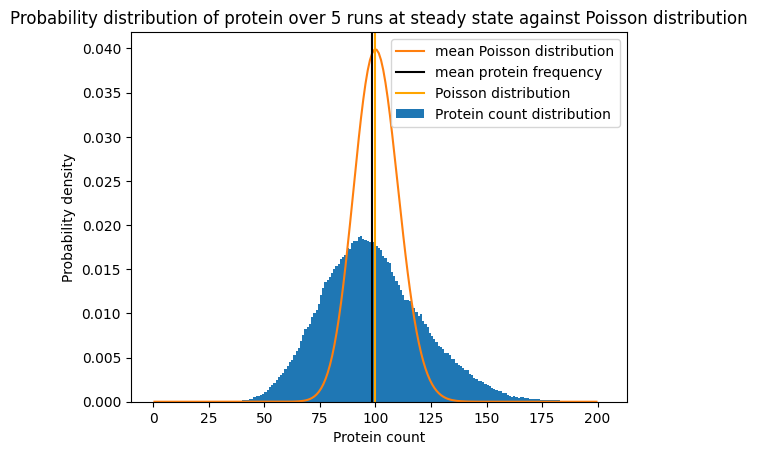

In [21]:
mu_protein = omega*(k0/k1)*(k2/k3)
poisson.stats(mu_protein)

fano_protein = np.var(protein_bin)/np.mean(protein_bin)

plt.figure()
plt.hist(protein_bin, bins=range(0, max(protein_bin)), density=True)
ar = np.arange(0, 200)
plt.plot(ar + 0.5, poisson.pmf(ar, mu_protein))
plt.axvline(np.mean(protein_bin), color = 'black')
plt.axvline(mu_protein, color = 'orange')
plt.legend(['mean Poisson distribution','mean protein frequency','Poisson distribution','Protein count distribution'])
plt.xlabel("Protein count")
plt.ylabel("Probability density")
plt.title("Probability distribution of protein over 5 runs at steady state against Poisson distribution")

In [22]:
np.mean(protein_bin), np.var(protein_bin), fano_protein, np.std(protein_bin)/np.sqrt(np.mean(protein_bin))

(98.495178, 519.2988527483158, 5.272327674237167, 2.2961549760931135)

## Q5


In [28]:
#k0 = 0.2 # mrna production rate
k1 = 0.01 # mrna degradation rate
k2 = 5 # protein production rate
k3 = 1 # protein degradation rate

omega = 1 # cell volume
stoichiometry = [1, -1, 1, -1]

def propensities(x,p,k0):
    return [omega*k0, k1*x, k2*x, k3*p]

def reaction_times(x,p,k0):
    a = propensities(x,p,k0)
    aInv = [1/s if s > 0 else np.inf for s in a]
    return -np.log(rand(4)) * aInv

def ssa_step(x, p, k0, tIn, tOut):
    # take the state x at time tIn and return the state at time tOut
    t = tIn
    
    while t < tOut:

        rt = reaction_times(x,p,k0)
        idx = np.argmin(rt)
        
        #tau = rt[idx]
        tau = np.min(rt)
        
        if idx <= 1:
            x += stoichiometry[idx] 

        else:
            p += stoichiometry[idx]

        t += tau

    return x, p

## Simulation loop

In [29]:
# Simulation code

mrna_bin = []
protein_bin = []
mrna_mean_bin = []
mrna_var_bin = []
protein_mean_bin = []
protein_var_bin = []
k0_bin = []

#plt.figure(figsize=(20,8))
#plt.xlabel("Time (arbitrary unit)")
#plt.ylabel("Absolute molecular count (arbitrary unit)")
#plt.title("Stochastic Simulation of mRNA & protein molecular count over time")

for j in range(500):
    print(str(j/5) + "'%' complete")
    k0 = np.random.uniform(0.2e-2,0.2e2)
    k0_bin.append(k0)
    dt = 0.0001 # time-step
    x = omega*(k0/k1)   # initial state
    p = x*(k2/k3)
    t = 0.0 
    mrna = [x]
    protein = [p]
    time = [t]
    for i in range(10000):
        #print("point " + str(i))
        x,p = ssa_step(x, p, k0, t, t+dt)
        t += dt
        mrna.append(x)
        protein.append(p)
        mrna_bin.append(x)
        protein_bin.append(p)
        time.append(t)

    mrna_mean_bin.append(np.mean(mrna))
    mrna_var_bin.append(np.var(mrna))
    protein_mean_bin.append(np.mean(protein))
    protein_var_bin.append(np.var(protein))

    
    #plt.plot(time, mrna)
    #plt.plot(time, protein)
    #plt.axhline(np.mean(mrna), color = 'blue')
    #plt.axhline(np.mean(protein), color = 'orange')
    #plt.legend(["mRNA","Protein"])

CV_mrna = np.divide(np.sqrt(mrna_var_bin),mrna_mean_bin) # coeff of var mRNA
CV_protein = np.divide(np.sqrt(protein_var_bin),protein_mean_bin) # coeff of var protein
noise_mrna = np.square(CV_mrna)
noise_protein = np.square(CV_protein)

0.0'%' complete
0.2'%' complete
0.4'%' complete
0.6'%' complete
0.8'%' complete
1.0'%' complete
1.2'%' complete
1.4'%' complete
1.6'%' complete
1.8'%' complete
2.0'%' complete
2.2'%' complete
2.4'%' complete
2.6'%' complete
2.8'%' complete
3.0'%' complete
3.2'%' complete
3.4'%' complete
3.6'%' complete
3.8'%' complete
4.0'%' complete
4.2'%' complete
4.4'%' complete
4.6'%' complete
4.8'%' complete
5.0'%' complete
5.2'%' complete
5.4'%' complete
5.6'%' complete
5.8'%' complete
6.0'%' complete
6.2'%' complete
6.4'%' complete
6.6'%' complete
6.8'%' complete
7.0'%' complete
7.2'%' complete
7.4'%' complete
7.6'%' complete
7.8'%' complete
8.0'%' complete
8.2'%' complete
8.4'%' complete
8.6'%' complete
8.8'%' complete
9.0'%' complete
9.2'%' complete
9.4'%' complete
9.6'%' complete
9.8'%' complete
10.0'%' complete
10.2'%' complete
10.4'%' complete
10.6'%' complete
10.8'%' complete
11.0'%' complete
11.2'%' complete
11.4'%' complete
11.6'%' complete
11.8'%' complete
12.0'%' complete
12.2'%' compl

In [30]:
mrna_bin, protein_bin

([1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1764.3232001591905,
  1765.3232001591905,
  1765.3232001591905,
  1765.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.3232001591905,
  1766.323

In [31]:
np.mean(mrna_bin), np.mean(protein_bin), k0_bin

(1022.4086773639056,
 5111.379497619535,
 [17.643232001591905,
  15.225534339148878,
  8.59357807601054,
  5.792876608271627,
  7.137815759040196,
  12.452306253017438,
  2.006348567850808,
  17.240898164950664,
  16.016493610778312,
  2.9634401557369467,
  14.597331296465685,
  10.267929009071205,
  9.094435268920058,
  13.473877510641795,
  18.70012107977051,
  6.538239786876259,
  4.4298670917717144,
  5.377827028200257,
  4.914030067813445,
  12.330309285705404,
  14.565376858082256,
  9.266374818420775,
  1.3198948430941606,
  7.1011006152622995,
  9.13478486686914,
  8.620821549311893,
  7.584798307757283,
  14.201006507616205,
  4.71477387937696,
  7.330697702912933,
  7.077294331000024,
  10.445171442440703,
  6.555914925659277,
  16.82755190218399,
  5.073135245730203,
  12.076724893768874,
  6.651533892315579,
  7.370668608503051,
  16.67769197328548,
  3.0542428272845914,
  6.680175665728592,
  1.5932343425672348,
  12.195711191683055,
  6.40677303380773,
  10.52735480996308

In [36]:
CV_mrna, CV_protein, noise_mrna, noise_protein

(array([0.00092497, 0.0021829 , 0.00176461, 0.00340968, 0.00388559,
        0.00157831, 0.00750632, 0.0013418 , 0.00326284, 0.0082974 ,
        0.00202281, 0.00163192, 0.00375765, 0.00152766, 0.00081111,
        0.00319812, 0.00292311, 0.00273496, 0.00343696, 0.00381657,
        0.00125711, 0.00180804, 0.0105476 , 0.0052667 , 0.00365061,
        0.00185199, 0.00240418, 0.00224248, 0.0043422 , 0.00081054,
        0.00349136, 0.00238152, 0.00312117, 0.00222448, 0.00258461,
        0.00262597, 0.00227707, 0.00416868, 0.00142307, 0.00519409,
        0.00349077, 0.00967758, 0.00137195, 0.00204789, 0.00137362,
        0.00136728, 0.00200112, 0.00125495, 0.00259913, 0.00259022,
        0.0015521 , 0.00366874, 0.01223931, 0.00113661, 0.00361291,
        0.00174135, 0.01016297, 0.0011412 , 0.00572739, 0.0041659 ,
        0.00268352, 0.00546432, 0.00169142, 0.00157013, 0.01094081,
        0.00099724, 0.00157614, 0.00170444, 0.00177788, 0.00070479,
        0.00419806, 0.00142472, 0.00171652, 0.00

## Plots

Text(0.5, 1.0, 'log(Noise) VS log(mean protein)')

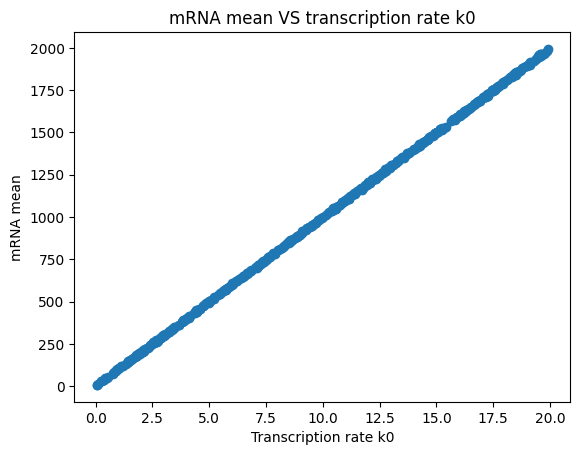

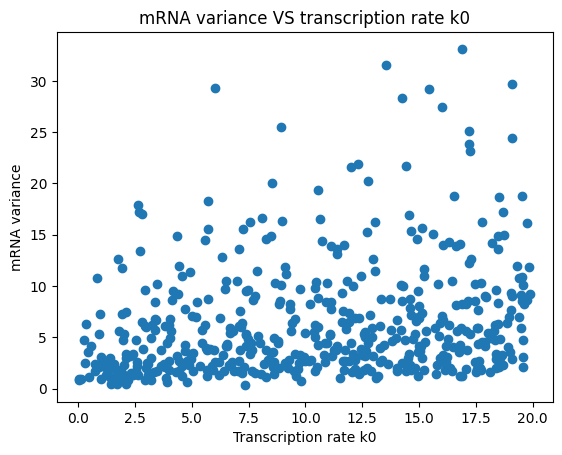

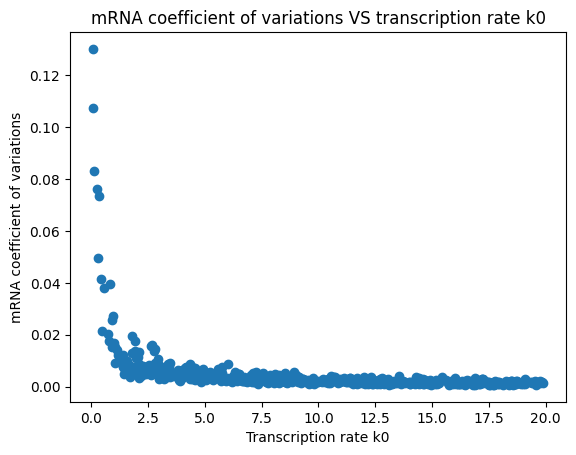

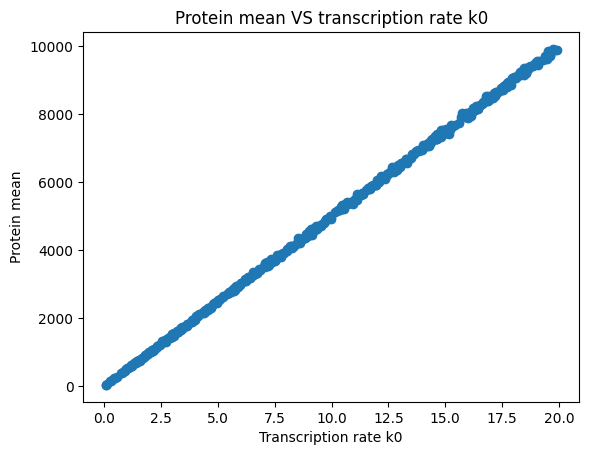

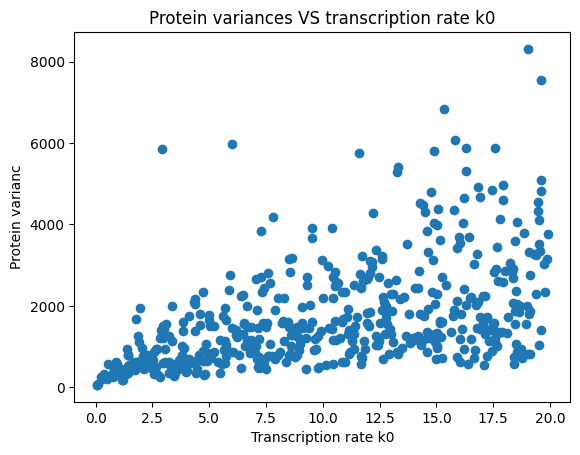

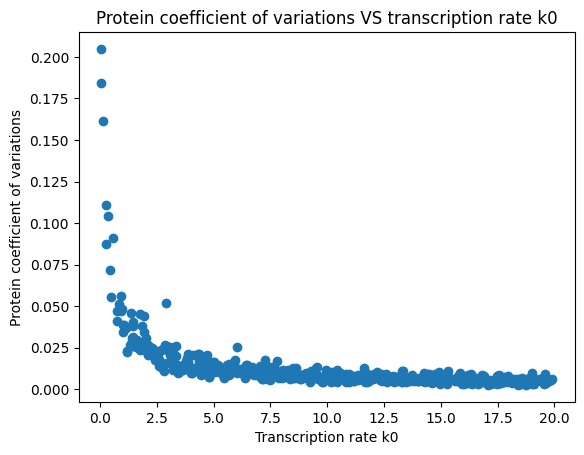

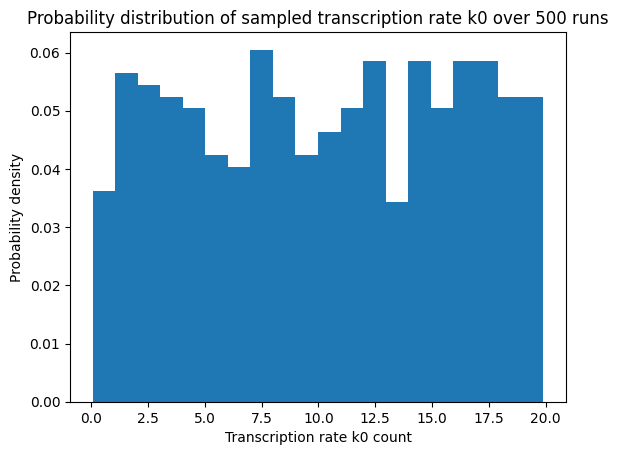

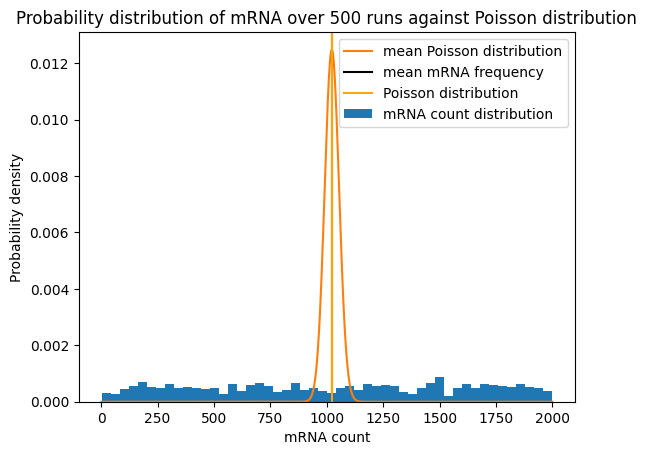

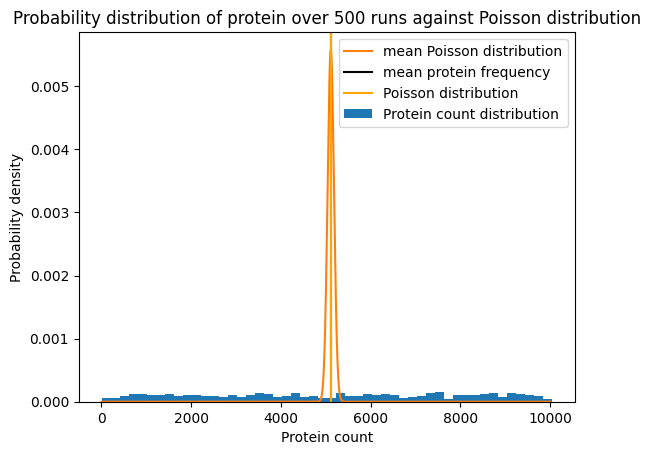

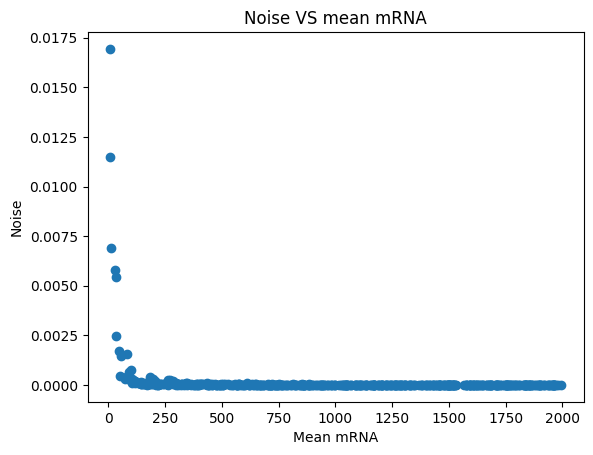

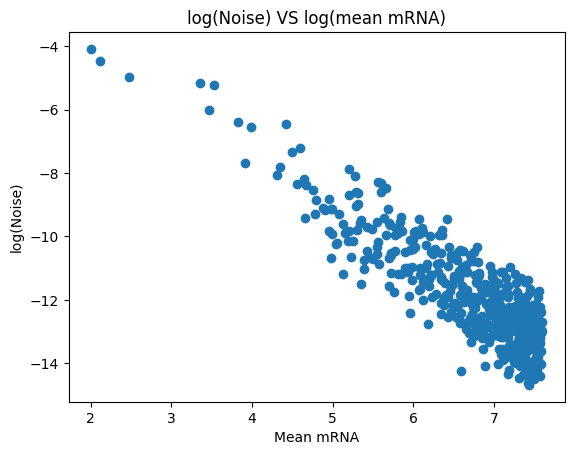

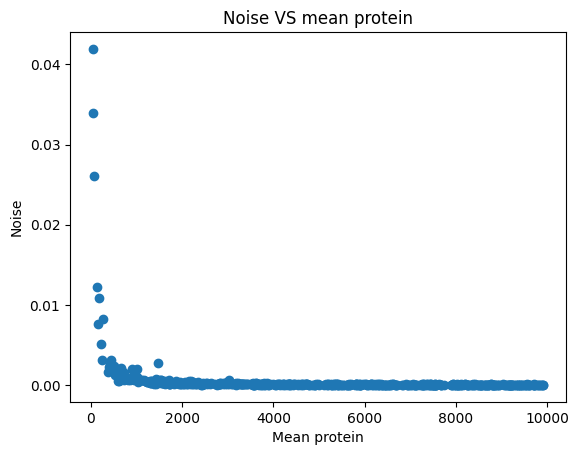

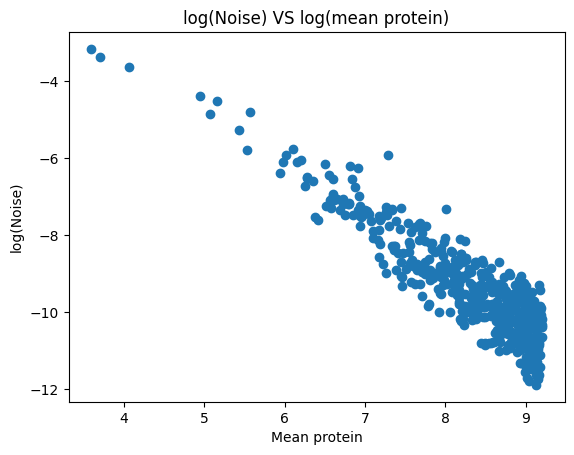

In [34]:
# mRNA mean vs transcription rate

plt.figure()
plt.scatter(k0_bin,mrna_mean_bin)
plt.ylabel("mRNA mean")
plt.xlabel("Transcription rate k0")
plt.title("mRNA mean VS transcription rate k0")

# mRNA variance vs transcription rate

plt.figure()
plt.scatter(k0_bin,mrna_var_bin)
plt.ylabel("mRNA variance")
plt.xlabel("Transcription rate k0")
plt.title("mRNA variance VS transcription rate k0")

# mRNA coefficient of variations vs transcription rate

plt.figure()
plt.scatter(k0_bin,CV_mrna)#[np.sqrt(a)/b for a,b in zip(mrna_var_bin,mrna_mean_bin)])
plt.ylabel("mRNA coefficient of variations")
plt.xlabel("Transcription rate k0")
plt.title("mRNA coefficient of variations VS transcription rate k0")

# Protein mean vs transcription rate

plt.figure()
plt.scatter(k0_bin,protein_mean_bin)
plt.ylabel("Protein mean")
plt.xlabel("Transcription rate k0")
plt.title("Protein mean VS transcription rate k0")

# Protein variance vs transcription rate

plt.figure()
plt.scatter(k0_bin,protein_var_bin)
plt.ylabel("Protein varianc")
plt.xlabel("Transcription rate k0")
plt.title("Protein variances VS transcription rate k0")

# Protein coefficient of variance vs transcription rate

plt.figure()
plt.scatter(k0_bin,CV_protein)#[np.sqrt(a)/b for a,b in zip(protein_var_bin,protein_mean_bin)])
plt.ylabel("Protein coefficient of variations")
plt.xlabel("Transcription rate k0")
plt.title("Protein coefficient of variations VS transcription rate k0")

# transcription rates distribution

plt.figure()
plt.hist(k0_bin, bins=20, density=True)
plt.xlabel("Transcription rate k0 count")
plt.ylabel("Probability density")
plt.title("Probability distribution of sampled transcription rate k0 over 500 runs")

# mRNA distribution

mu_mrna = np.mean(mrna_bin)#omega*(k0/k1)
poisson.stats(mu_mrna)

fano_mrna = np.var(mrna_bin)/np.mean(mrna_bin)

plt.figure()
plt.hist(mrna_bin, 50, density=True)
ar = np.arange(0, 2000)
plt.plot(ar + 0.5, poisson.pmf(ar, mu_mrna))
plt.axvline(np.mean(mrna_bin), color = 'black')
plt.axvline(mu_mrna, color = 'orange')

plt.xlabel("mRNA count")
plt.ylabel("Probability density")
plt.legend(['mean Poisson distribution','mean mRNA frequency','Poisson distribution','mRNA count distribution'])
plt.title("Probability distribution of mRNA over 500 runs against Poisson distribution")

# protein distribution

mu_protein = np.mean(protein_bin)#omega*(k0/k1)*(k2/k3)
poisson.stats(mu_protein)

fano_protein = np.var(protein_bin)/np.mean(protein_bin)

plt.figure()
plt.hist(protein_bin, 50, density=True)
ar = np.arange(0, 10000)
plt.plot(ar + 0.5, poisson.pmf(ar, mu_protein))
plt.axvline(np.mean(protein_bin), color = 'black')
plt.axvline(mu_protein, color = 'orange')

plt.legend(['mean Poisson distribution','mean protein frequency','Poisson distribution','Protein count distribution'])
plt.xlabel("Protein count")
plt.ylabel("Probability density")
plt.title("Probability distribution of protein over 500 runs against Poisson distribution")

# mRNA noise vs mean

plt.figure()
plt.scatter(mrna_mean_bin,noise_mrna)#[a/(b**2) for a,b in zip(mrna_var_bin,mrna_mean_bin)])
plt.xlabel("Mean mRNA")
plt.ylabel("Noise")
plt.title("Noise VS mean mRNA")

plt.figure()
plt.scatter(np.log(mrna_mean_bin),np.log(noise_mrna))#[np.log(a/(b**2)) for a,b in zip(mrna_var_bin,mrna_mean_bin)])
plt.xlabel("Mean mRNA")
plt.ylabel("log(Noise)")
plt.title("log(Noise) VS log(mean mRNA)")

# Protein noise vs mean

plt.figure()
plt.scatter(protein_mean_bin,noise_protein)#[a/(b**2) for a,b in zip(protein_var_bin,protein_mean_bin)])
plt.xlabel("Mean protein")
plt.ylabel("Noise")
plt.title("Noise VS mean protein")

plt.figure()
plt.scatter(np.log(protein_mean_bin),np.log(noise_protein))#[np.log(a/(b**2)) for a,b in zip(protein_var_bin,protein_mean_bin)])
plt.xlabel("Mean protein")
plt.ylabel("log(Noise)")
plt.title("log(Noise) VS log(mean protein)")
